# Simple example code for GPR: examples and hyperparameters tuning.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor # This is the Gaussian process regressor from sklean
from sklearn.gaussian_process.kernels import ConstantKernel, RBF # This is different kernel function embedded in the sklearn. RBF is what we usually use in the kernel function.

In [7]:
def y(x, noise_sigma=0.0):
    x = np.asarray(x)
    y = np.cos(x) + np.random.normal(0, noise_sigma, size=x.shape)
    return y.tolist()

train_X = np.array([3, 1, 4, 5, 9]).reshape(-1, 1)
train_y = y(train_X, noise_sigma=1e-4)
test_X = np.arange(0, 10, 0.1).reshape(-1, 1)
# Examples X and Y

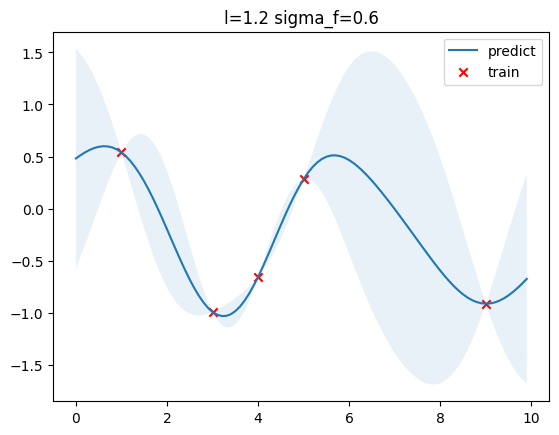

In [8]:
kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2)
gpr.fit(train_X, train_y)
mu, cov = gpr.predict(test_X, return_cov=True)
test_y = mu.ravel()
uncertainty = 1.96 * np.sqrt(np.diag(cov))

# plotting
plt.figure()
plt.title("l=%.1f sigma_f=%.1f" % (gpr.kernel_.k2.length_scale, gpr.kernel_.k1.constant_value))
plt.fill_between(test_X.ravel(), test_y + uncertainty, test_y - uncertainty, alpha=0.1)
plt.plot(test_X, test_y, label="predict")
plt.scatter(train_X, train_y, label="train", c="red", marker="x")
plt.legend()

# Using Simple words to explain GPR

## Given n features X_1 to X_n and their corresponding Y_1 to Y_n or f(X_1) to f(X_n). We assume ( f(X_1),f(X_2), ... , f(X_n)) follow joint normal distribution. With mean 0 and cov_matrix M. The element of M_ij is defined by a kernel function ker(X_i, X_j). So with new feature come in , we have f(X_n+1) also follows normal distrbutions. And the mean of this distribution is the estimate we want from the model.

## The hyperparameters in the model is the parameters in the kernel function and kernel function itself. Similar to other ML models, we can estimate the parameters based on the grid search cross validation method to find local optimal hyperparameters.
